In [117]:
# import all the libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [118]:
# define the functions

# A couple of ways to define the polynomial function

def create_poly(X, deg):
    n = len(X)
    data = [np.ones(n)]
    for d in range(deg):
        data.append(X**(d+1))
    return np.vstack(data).T

def make_poly(X,deg):
    N=len(X)
    data =np.empty((N,deg+1))
    for i in range(deg+1):
        data[:,i] = X**i
    return data


def fit(X, Y):
    return np.linalg.solve(X.T.dot(X), X.T.dot(Y))

def get_mse(Y, Yhat):
    Residual = Y - Yhat
    return Residual.dot(Residual) / len(Y)


In [123]:
# Define test train plot 
def plot_train_vs_test_curves(X, Y, sample=20, max_deg=20):
    N = len(X)
    train_idx = np.random.choice(N, sample)
    Xtrain = X[train_idx]
    Ytrain = Y[train_idx]

    test_idx = [idx for idx in range(N) if idx not in train_idx]

    Xtest = X[test_idx]
    Ytest = Y[test_idx]

    mse_trains = []
    mse_tests = []
    for deg in range(max_deg+1):
        Xtrain_poly = make_poly(Xtrain, deg)
        w = fit(Xtrain_poly, Ytrain)
        Yhat_train = Xtrain_poly.dot(w)
        mse_train = get_mse(Ytrain, Yhat_train)

        Xtest_poly = make_poly(Xtest, deg)
        Yhat_test = Xtest_poly.dot(w)
        mse_test = get_mse(Ytest, Yhat_test)

        mse_trains.append(mse_train)
        mse_tests.append(mse_test)

    plt.plot(mse_trains, label="train mse")
    plt.plot(mse_tests, label="test mse")
    plt.legend()
    plt.show()

    plt.plot(mse_trains, label="train mse")
    plt.legend()

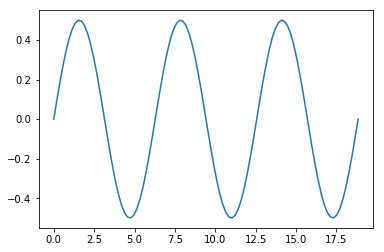

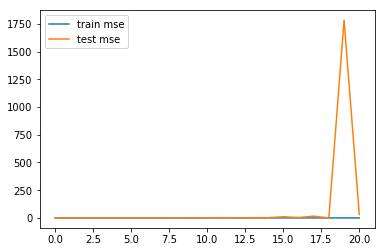

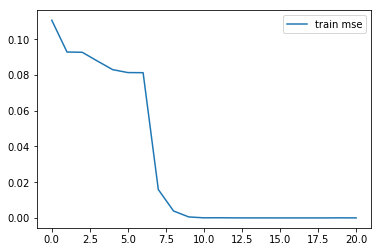

In [124]:
if __name__ == "__main__":
# make up some data and plot it
    N = 100
    X = np.linspace(0,np.pi*6, N)
# add a bit of noice to Y
    Y = np.sin(X)*0.5

    plt.plot(X, Y)
    plt.show()

    plot_train_vs_test_curves(X, Y)
   